# British Airways Predictive Modeling  Of  Customer Bookings

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Exploratory data analysis
data = pd.read_csv("C:\\Users\\admin\\Desktop\\malik program\\customer_booking_csv.csv" , encoding="ISO-8859-1")
data.head()                                                    

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
data.info()                 # Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data.shape                 # Data shape

(50000, 14)

In [5]:
# descriptive statistics
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### Data Visualization

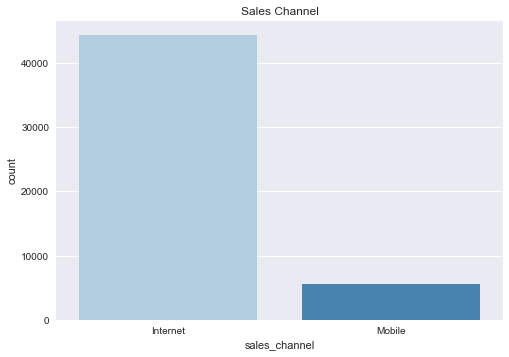

In [6]:
# sales channel
plt.style.use('seaborn')
sns.countplot(x='sales_channel',data=data ,palette='Blues')
plt.title('Sales Channel')
sns.despine()

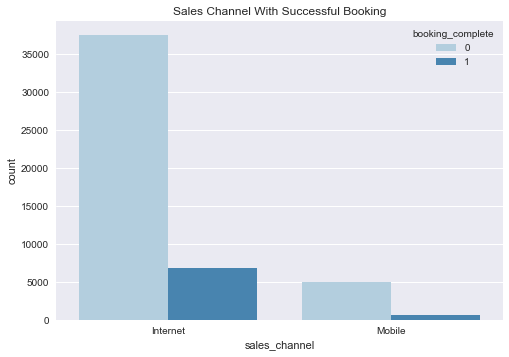

In [7]:
# sales channel with successful booking
sns.countplot(x='sales_channel',data=data,hue='booking_complete',palette='Blues')
plt.title('Sales Channel With Successful Booking')
sns.despine()

In [8]:
# sales channel in %
internet_sale = data.sales_channel.value_counts().values[0]  / data.sales_channel.count() *100
mobile_sale = data.sales_channel.value_counts().values[1]  / data.sales_channel.count() *100
print(f"Number of bookings done through internet: {internet_sale} %")
print(f"Number of bookings done through phone call: {mobile_sale} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


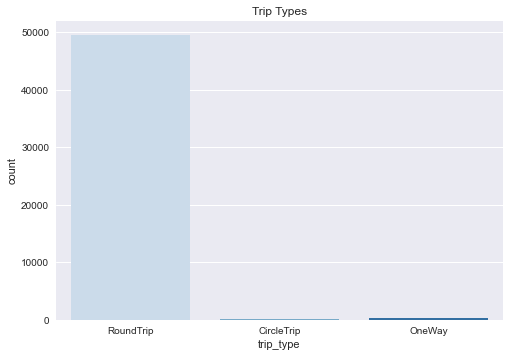

In [9]:
# tripe types
sns.countplot(x='trip_type',data=data,palette='Blues')
plt.title('Trip Types')
sns.despine()

In [10]:
# trip type in %
round_trip = data.trip_type.value_counts().values[0]/ data.trip_type.count() *100
oneway_trip = data.trip_type.value_counts().values[1]/ data.trip_type.count() *100
circle_trip = data.trip_type.value_counts().values[2]/ data.trip_type.count() *100
print(f"Percentage of round trips: {round_trip} %")
print(f"Percentage of One way trips: {oneway_trip} %")
print(f"Percentage of circle trips: {circle_trip} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


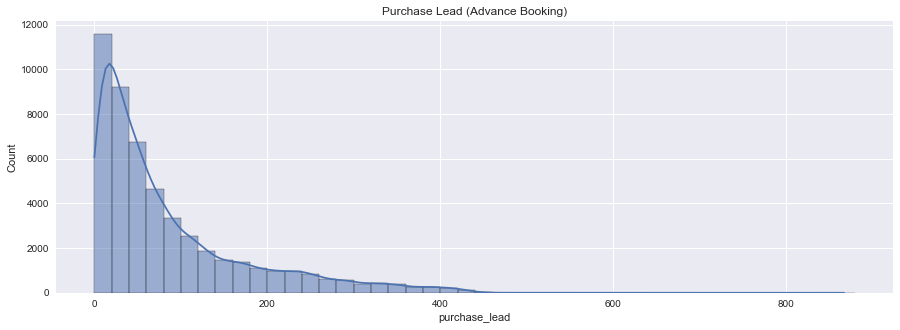

In [11]:
# purchase lead
plt.figure(figsize=(15,5))
sns.histplot(data=data, x="purchase_lead", binwidth=20,kde=True)
plt.title('Purchase Lead (Advance Booking)')
plt.show()

From the above visualization we can understand that most of the purchase lead (advance booking) is in between 0 to 600 days 
there for the purchase lead which is more than 600 days we will treat them as outliers to increase the accuracy of the predictive modeling



In [12]:
# Checking the purchase lead with more than 600 days
(data.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

There are only 8 purchase lead with more than 600 days of advance booking hence we will remove them 

In [13]:
# data with more than 600 days of purchase lead
data[data.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [14]:
# filtering the data to have only purchase lead days less than 600 days
data = data[data.purchase_lead <600 ]

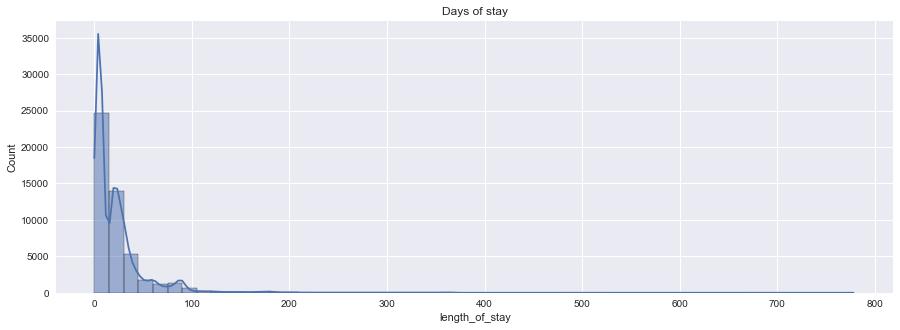

In [15]:
# Length Of Stay
plt.figure(figsize=(15,5))
sns.histplot(data=data, x="length_of_stay", binwidth=15,kde=True)
plt.title('Days of stay')
plt.show()

From the above visualization we can understand that most of the length of stays (days stay) is in between 0 to 100 but we also have length of stay with more than 100 . hence we will focus on the length of stay till 500 days 

In [16]:
# Checking the data for length of stay with more then 100 days
(data.length_of_stay> 100).value_counts()

False    48854
True      1138
Name: length_of_stay, dtype: int64

In [17]:
# Checking the data for length of stay with more then 500 days with successful bookinh 
data[data.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

In [18]:
# filtering the data to have only length of stay less than 500 days
data = data[data.purchase_lead <500 ]

In [19]:
data.shape       # filterd data shape

(49982, 14)

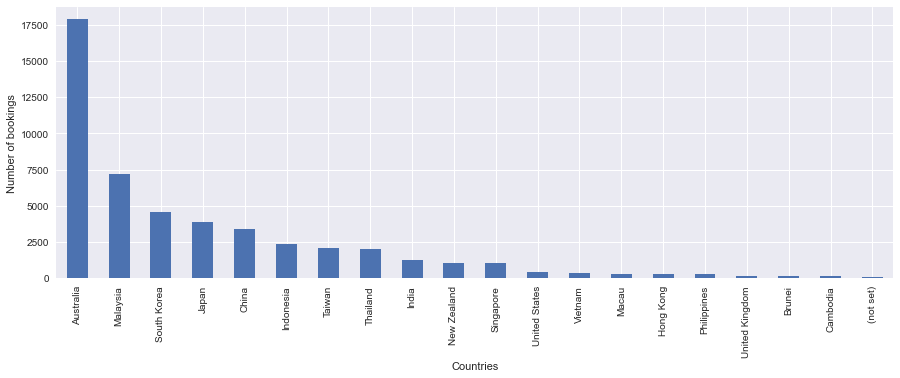

In [20]:
# travellers from which country had maximum booking applications (top 20 countrys)
plt.figure(figsize=(15,5))
ax = data.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")
plt.show()

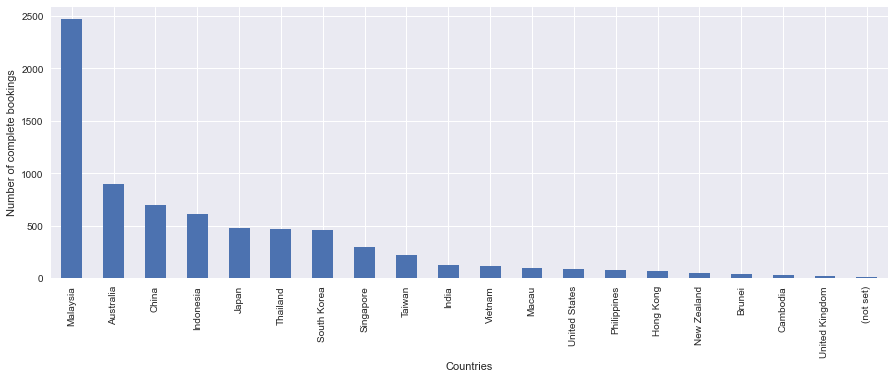

In [21]:
# travellers from which country had their booking complete (top 20 countrys)
plt.figure(figsize=(15,5))
ax = data[data.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel('Countries')
ax.set_ylabel('Number of complete bookings')
plt.show()

In [22]:
# looking for % of successfull booking in 50000 entries
successful_booking = data.booking_complete.value_counts().values[0] / len(data) * 100
unsuccessful_booking = 100-successful_booking
print(f"Out of 50000 booking entries only {round(unsuccessful_booking,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


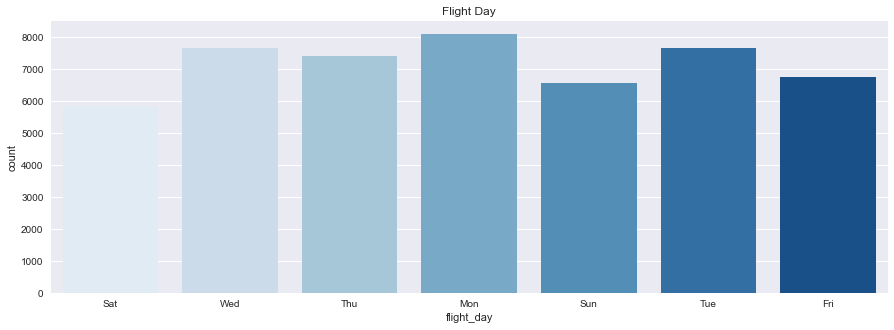

In [23]:
# flight day
plt.figure(figsize=(15, 5))
sns.countplot(x='flight_day', data=data, palette='Blues')
plt.title('Flight Day')
plt.show()

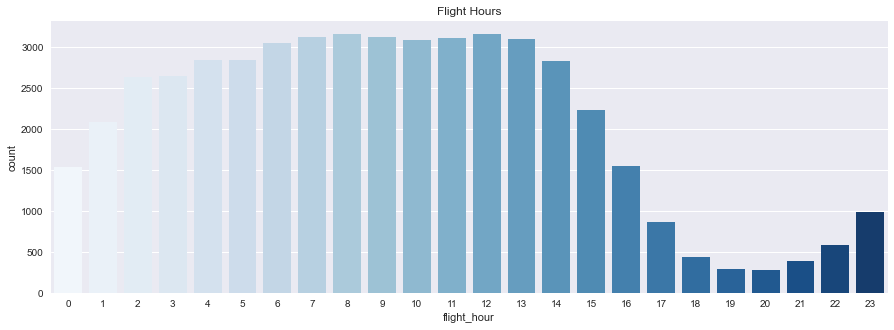

In [24]:
# flight hours
plt.figure(figsize=(15, 5))
sns.countplot(x="flight_hour", data=data, palette='Blues')
plt.title('Flight Hours')
plt.show()

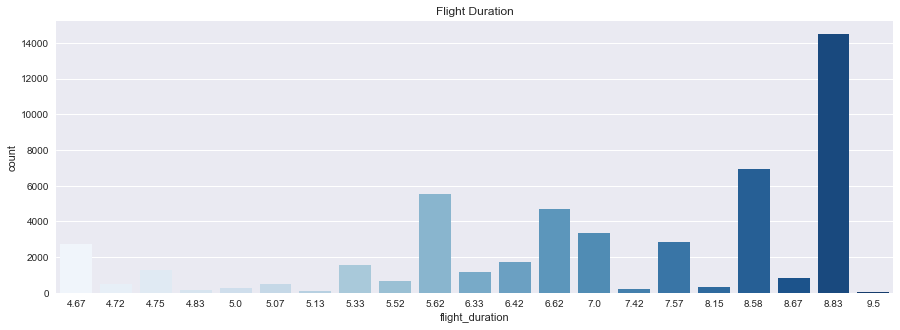

In [25]:
# flight duration
plt.figure(figsize=(15, 5))
sns.countplot(x="flight_duration", data=data, palette='Blues')
plt.title('Flight Duration')
plt.show()

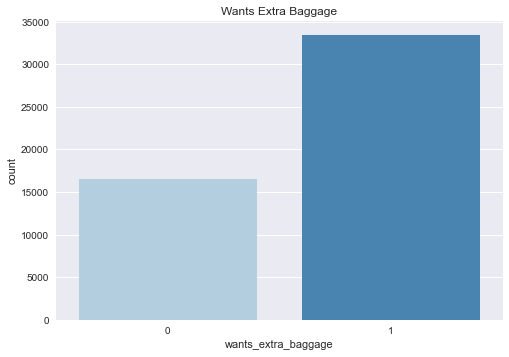

In [26]:
# wants extra baggage 
sns.countplot(x='wants_extra_baggage', data=data, palette='Blues')
plt.title('Wants Extra Baggage')
plt.show()

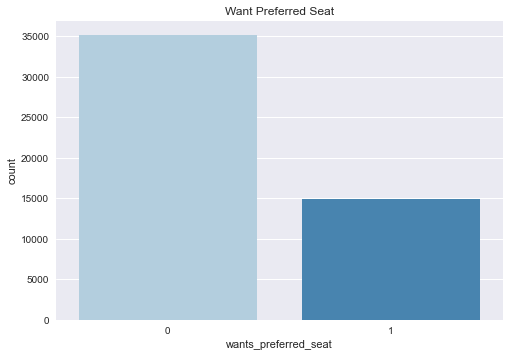

In [27]:
# wants preferred seat
sns.countplot(x='wants_preferred_seat', data=data, palette='Blues')
plt.title('Want Preferred Seat')
plt.show()

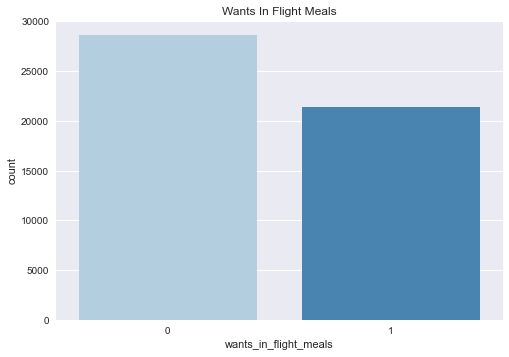

In [28]:
# wants in flight_meals
sns.countplot(x='wants_in_flight_meals', data=data, palette='Blues')
plt.title('Wants In Flight Meals')
plt.show()

In [29]:
# Converting the flight day column into required format
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [30]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [31]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [32]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [33]:
data.shape

(49982, 14)

## Predictive Modeling

In [34]:
# Encodeing the "sales_channel" & "trip_types" column using get_dummies() function
dummies= pd.get_dummies(data[['sales_channel','trip_type']])
dummies.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


In [35]:
data = data.join(dummies)

In [36]:
# droping the categorical columns now
data = data.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1)

In [37]:
#store the target column for supervised learning
target = data['booking_complete']

In [38]:
# droping the target column
data = data.drop('booking_complete', axis=1)

In [39]:
data.isnull().sum()    # checking for null values

num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64

### Normalizaing the values

In [40]:
# Scaleing the data using the Standard Scaler to create a scaled DataFrame
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaleing the data
scaled_data = scaler.fit_transform(data)

#create a dataframe of scled data
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)

In [41]:
# add the target back to the dataframe
scaled_data['target']  = target
scaled_data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,target
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0.0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0.0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0.0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0.0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0.0


In [42]:
scaled_data = scaled_data.dropna()

In [43]:
# converting 'target' from float to int 
scaled_data['target'] = scaled_data['target'].astype(int) 

In [44]:
scaled_data['target'].value_counts()

0    42490
1     7474
Name: target, dtype: int64

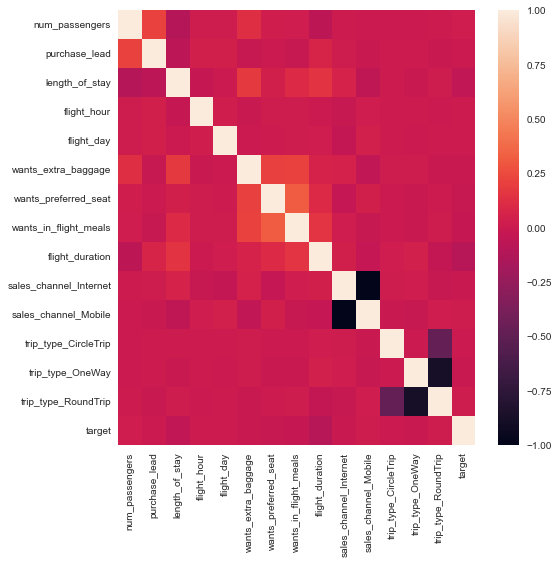

In [45]:
# corelation matrix
corr = scaled_data.corr()

plt.figure(figsize=(8,8))

#plot the heatmap
sns.heatmap(corr)
plt.show()

In [46]:
# input data
x = scaled_data.drop('target',axis=1)

In [47]:
x.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826


In [48]:
# output 
y = scaled_data['target']

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

[0.05739913 0.27959395 0.21552625 0.20172677 0.10402633 0.00996684
 0.00888617 0.00965912 0.10779493 0.00204767 0.00208631 0.00028756
 0.00043635 0.00056262]


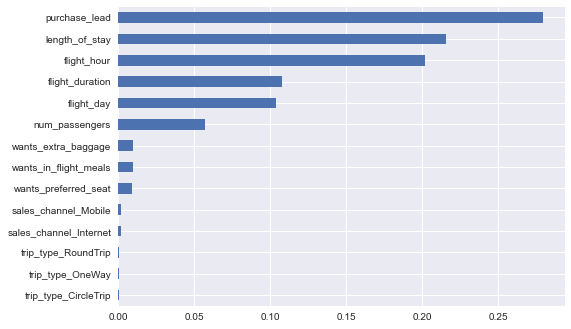

In [50]:
# feature selection 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [51]:
# will select the best features for model building
x = x.drop(['trip_type_CircleTrip','trip_type_OneWay','trip_type_RoundTrip'],axis=1)
x.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786


In [52]:
# train test split
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape ,x_test.shape , y_train.shape , y_test.shape

((39971, 11), (9993, 11), (39971,), (9993,))

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# random forest model creation
rf_model = RandomForestClassifier(n_estimators=10 , max_depth =50 , min_samples_split=5,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [57]:
rf_preds = rf_model.predict(x_test)

In [58]:
# Evaluation of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [59]:
print('ACCURACY: ',accuracy_score(y_test,rf_preds)*100)

ACCURACY:  84.59921945361754


In [60]:
confusion_matrix(y_test,rf_preds)

array([[8400,  170],
       [1369,   54]], dtype=int64)

<Figure size 1600x1100 with 0 Axes>

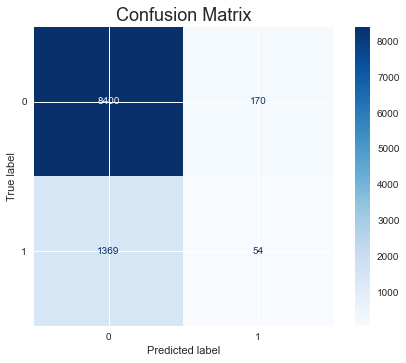

In [61]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200)
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test,cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [62]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8570
           1       0.24      0.04      0.07      1423

    accuracy                           0.85      9993
   macro avg       0.55      0.51      0.49      9993
weighted avg       0.77      0.85      0.79      9993



The model is giving good accuracy we will fit the complete data 

In [63]:
# random forest final model 
rf_model_final = RandomForestClassifier(n_estimators=10 , max_depth =50 , min_samples_split=5,random_state=42)
rf_model_final.fit(x,y)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [64]:
# we will save the model
import pickle

In [65]:
pickle.dump(rf_model_final,open('British_Airways_predictive_model.pkl','wb'))

In [66]:
# loading the saved model 
load_model = pickle.load(open('British_Airways_predictive_model.pkl','rb'))